In [2]:
import pandas as pd
df = pd.read_csv('sentiment.csv')
df.head(5)

,tag,text
0,P,店家很給力，快遞也是相當快，第三次光顧啦
1,N,這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。
2,P,不錯，在同等檔次酒店中應該是值得推薦的！
3,N,哎！ 不會是蒙牛乾的吧 嚴懲真凶！
4,N,空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字


In [3]:
print(len(df))
print(df['tag'].value_counts())

6388
N    3347
P    3041
Name: tag, dtype: int64


In [4]:
import jieba
df['token_text'] = df['text'].apply(lambda x:list(jieba.cut(x)))
df.head(5)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\POPO\AppData\Local\Temp\jieba.cache
Loading model cost 0.757 seconds.
Prefix dict has been built succesfully.


,tag,text,token_text
0,P,店家很給力，快遞也是相當快，第三次光顧啦,"[店家, 很, 給力, ，, 快遞, 也, 是, 相當快, ，, 第三次, 光顧, 啦]"
1,N,這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。,"[這樣, 的, 配置, 用, Vista, 系統, 還是, 有點, 卡, 。, , 指紋,..."
2,P,不錯，在同等檔次酒店中應該是值得推薦的！,"[不錯, ，, 在, 同等, 檔次, 酒店, 中應, 該, 是, 值得, 推薦, 的, ！]"
3,N,哎！ 不會是蒙牛乾的吧 嚴懲真凶！,"[哎, ！, , 不會, 是, 蒙牛, 乾, 的, 吧, , 嚴懲, 真凶, ！]"
4,N,空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字,"[空, 尤其, 是, 三立, 電視, 臺, 女主播, 做, 的, 序, 尤其, 無趣, 像是..."


In [6]:
def count(data):
    term_dict = {}
    for doc in data:
        for term in doc:
            if term not in term_dict:
                term_dict[term] = 1
            else:
                term_dict[term] = term_dict[term] +1
    return term_dict
df_p = df[df['tag']=="P"]
df_n = df[df['tag']=="N"]
word_p = count(df_p['token_text'])
word_p = pd.DataFrame(list(word_p.items()), columns=['word', 'TF_p'])

word_n = count(df_n['token_text'])
word_n = pd.DataFrame(list(word_n.items()), columns=['word', 'TF_n'])

In [18]:
word_p['len'] = word_p['word'].apply(lambda x: len(x))
word_n['len'] = word_n['word'].apply(lambda x: len(x))
word_p = word_p[word_p.len>1]
word_n = word_n[word_n.len>1]
word_all = pd.merge(word_p[['TF_p','word']], word_n[['TF_n','word']], how='inner')
word_all.head(5)

,TF_p,word,TF_n
0,7,店家,1
1,18,快遞,9
2,10,第三次,1
3,855,不錯,52
4,7,同等,1


In [19]:
import numpy as np
word_all['positive'] = word_all.TF_p/sum(word_all.TF_p)
word_all['negative'] = word_all.TF_n/sum(word_all.TF_n)
word_all['log_ratio'] = np.log(word_all['positive']/word_all['negative'])
word_all['type'] = word_all['log_ratio'].apply(lambda x: 'Positive' if x>=0 else 'Negative')
word_all = word_all.sort_values(by='log_ratio', ascending=False)
most_p = word_all[:10]
most_p

,TF_p,word,TF_n,positive,negative,log_ratio,type
453,64,比高,1,0.002964,0.000046,4.175464,Positive
298,49,時尚,1,0.002269,0.000046,3.908401,Positive
372,29,光明,1,0.001343,0.000046,3.383877,Positive
103,29,感謝,1,0.001343,0.000046,3.383877,Positive
416,27,正品,1,0.001250,0.000046,3.312418,Positive
334,26,合適,1,0.001204,0.000046,3.274677,Positive
418,26,好吃,1,0.001204,0.000046,3.274677,Positive
800,25,挺快,1,0.001158,0.000046,3.235457,Positive
162,25,幸福,1,0.001158,0.000046,3.235457,Positive
411,123,漂亮,5,0.005697,0.000228,3.219327,Positive


In [20]:
most_n = word_all[-10:]
most_n

,TF_p,word,TF_n,positive,negative,log_ratio,type
506,3,不如,51,0.000139,0.002323,-2.816632,Negative
1164,1,招待所,17,0.000046,0.000774,-2.816632,Negative
2052,1,太慢,17,0.000046,0.000774,-2.816632,Negative
738,2,再也,36,0.000093,0.001640,-2.873791,Negative
1364,2,太差,48,0.000093,0.002186,-3.161473,Negative
1883,2,垃圾,63,0.000093,0.002870,-3.433407,Negative
1860,4,抵制,134,0.000185,0.006104,-3.494965,Negative
1972,1,不了,36,0.000046,0.001640,-3.566938,Negative
2370,1,根本,39,0.000046,0.001777,-3.646981,Negative
1795,2,內容,116,0.000093,0.005284,-4.043862,Negative


C:\Users\POPO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\POPO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


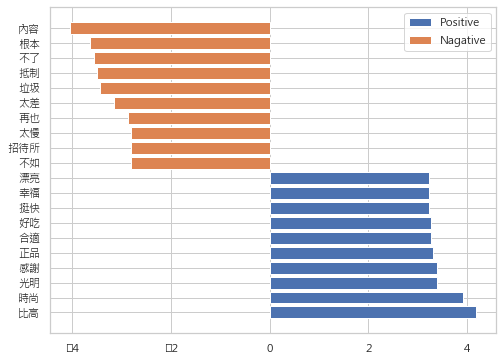

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
plt.figure(figsize=(8, 6)) 
plt.rcParams.update({'font.size': 12})

plt.barh(most_p['word'],most_p['log_ratio'], label="Positive")
plt.barh(most_n['word'],most_n['log_ratio'], label="Nagative")
plt.legend()
plt.show()

In [24]:
from gensim.models import Word2Vec
model = Word2Vec(df['token_text'], min_count=1, size=300, window=5, sg=1, workers=2)

C:\Users\POPO\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [25]:
def avg_w2v_vector(text_list):
    sum_vec = sum([model[word] if word in model else np.zeros(300) for word in text_list])
    result = sum_vec/len(text_list)  
    return result

df['doc_vec'] = df['token_text'].apply(lambda x: avg_w2v_vector(x))
df.head(5)

C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


,tag,text,token_text,doc_vec
0,P,店家很給力，快遞也是相當快，第三次光顧啦,"[店家, 很, 給力, ，, 快遞, 也, 是, 相當快, ，, 第三次, 光顧, 啦]","[-0.016520048, 0.0077825557, -0.16250134, -0.0..."
1,N,這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。,"[這樣, 的, 配置, 用, Vista, 系統, 還是, 有點, 卡, 。, , 指紋,...","[-0.04450718, 0.025762076, -0.14059527, -0.091..."
2,P,不錯，在同等檔次酒店中應該是值得推薦的！,"[不錯, ，, 在, 同等, 檔次, 酒店, 中應, 該, 是, 值得, 推薦, 的, ！]","[-0.042635225, 0.0038377775, -0.18629533, -0.0..."
3,N,哎！ 不會是蒙牛乾的吧 嚴懲真凶！,"[哎, ！, , 不會, 是, 蒙牛, 乾, 的, 吧, , 嚴懲, 真凶, ！]","[0.011433048, 0.07351548, -0.21515487, -0.0702..."
4,N,空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字,"[空, 尤其, 是, 三立, 電視, 臺, 女主播, 做, 的, 序, 尤其, 無趣, 像是...","[-0.022171995, -0.0032567931, -0.101863645, -0..."


In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 123)
print(len(train))
print(len(test))

5110
1278


In [29]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(list(train['doc_vec']), train['tag'])

C:\Users\POPO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
result = svm_model.predict(list(test['doc_vec']))
test['predict_svm'] = result
print(sum(test['tag']==test['predict_svm'])/len(test))

0.7097026604068858


C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test['tag'],test['predict_svm'],labels=['P', 'N'])
print(conf)
pd.DataFrame(conf, index=['true(P)', 'true(N)'], columns=['pred(P)', 'pred(N)'])

[[351 271]
 [100 556]]


,pred(P),pred(N)
true(P),351,271
true(N),100,556


In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(list(train['doc_vec']), train['tag'])

C:\Users\POPO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
result = logreg.predict(list(test['doc_vec']))
test['predict_log'] = result

C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
print(sum(test['tag']==test['predict_log'])/len(test))

0.7550860719874805


In [35]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=700, max_depth=7,random_state=0)
clf.fit(list(train['doc_vec']), train['tag'])  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
result = clf.predict(list(test['doc_vec']))
test['predict_log'] = result

C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
print(sum(test['tag']==test['predict_log'])/len(test))

0.7652582159624414
